# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [2]:
#Importing all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score,classification_report,recall_score,precision_score,roc_curve

In [3]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install --upgrade xlrd

In [5]:
#Loading the dataset
df= pd.read_excel('/content/drive/MyDrive/dataforassign/default of credit card clients.xls')

#Data Inspection

In [6]:
#Checking the head of the data
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [7]:
#Since the names of the columns are present in first row of our data, we need to change this.
#This could be because of the irregularities in the extraction process.
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [8]:
#Replacing the columns names with first row in our dataset
df.columns=df.iloc[0]

In [9]:
#Checking the columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [10]:
#Dropping the first row
df.drop(labels=0,axis=0,inplace=True)

In [11]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [12]:
#Tail of the data
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [13]:
#Checking the shape of the dataframe
df.shape

(30000, 25)

We have 25 columns and 30000 rows in our data.

In [14]:
#Description of the data
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,1,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [15]:
#Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [16]:
#Converting all the columns to int datatype
df=df.astype('int')

In [17]:
df.describe() #checking

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [18]:
#Checking for null values 
df.isnull().sum() 

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Clearly from the above information we can say that there are no null values in our data and we can proceed to exploratory data analysis.

#Exploratory Data Analysis

Our target variable is default payment next month so let's start with this.

In [19]:
#Renaming this columns as Defaulters
df.rename(columns = {'default payment next month':'default_payment'},inplace=True)

In [20]:
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [21]:
#Default_payment count
df['default_payment'].value_counts()

0    23364
1     6636
Name: default_payment, dtype: int64

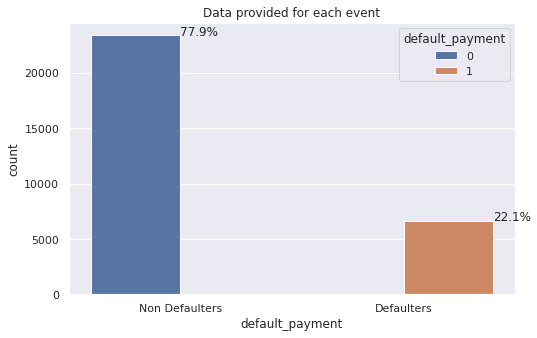

In [22]:
#Plotting the countplot with percentages for default payment
plt.figure(figsize=(8,5))
total = float(len(df)) 
ax = sns.countplot(x="default_payment", hue="default_payment", data=df)
plt.title('Data provided for each event')
ax.set_xticklabels(['Non Defaulters','Defaulters'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y))
plt.show()

There are around 77% non defaulters and 22% of defaulters.
So clearly there a class imbalance.

In [23]:
#Checking if there are limit_balance values below 0 because balance can't be below 0
(df['LIMIT_BAL']<0).sum()

0

In [24]:
#Creating a dataframe of Limit_bal by default_payment
data_wide = df.pivot(columns = 'default_payment', values = 'LIMIT_BAL')
data_wide.head(2)

default_payment,0,1
1,NaN,20000.0
2,NaN,120000.0


Text(0.5, 1.0, 'Density Plot of Limit_Bal by default_payment')

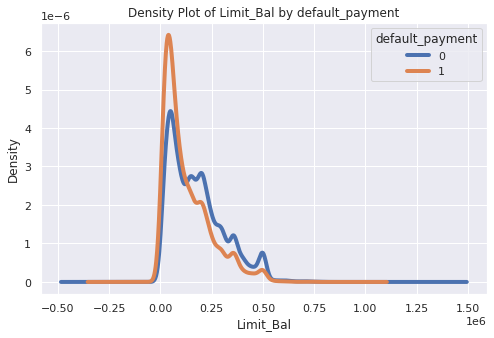

In [25]:
#Plotting the density plot
data_wide.plot.kde(figsize = (8, 5),linewidth = 4)
plt.xlabel('Limit_Bal')
plt.title('Density Plot of Limit_Bal by default_payment')

From the density plot we can say that when the credit amount is low , there are more defaulters.

In [26]:
#Analysis by gender
gen_wide=df.pivot(columns = 'default_payment', values = 'SEX')
gen_wide.head()

default_payment,0,1
1,NaN,2.0
2,NaN,2.0
3,2.0,NaN
4,2.0,NaN
5,1.0,NaN


Text(0.5, 1.0, 'Density Plot of Gender by default_payment')

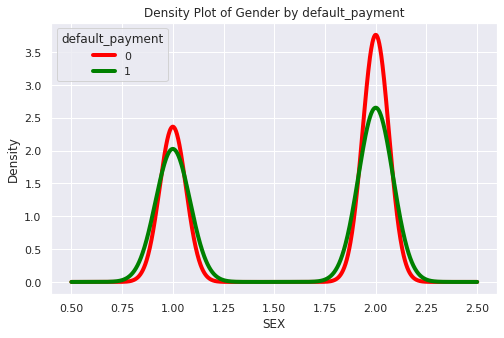

In [27]:
#Plotting the graph
gen_wide.plot.kde(figsize = (8, 5),linewidth = 4,color=['red','green'])
plt.xlabel('SEX')
plt.title('Density Plot of Gender by default_payment')

From the above graph we can say that there is no much difference in defaulters between male and female but females are more likely to not be a defaulter.

In [28]:
#Analysis by education
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Here we can see that there are extra labels 0,5,6 in education columns
Either we can drop these values since they less in number or we can group them as others i.e. 4

In [29]:
#Grouping those extra values
edu_con =(df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)

In [30]:
#Changing thier label to 4
df.loc[edu_con, 'EDUCATION' ] = 4

In [31]:
df['EDUCATION'].value_counts() #Checking

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

[Text(0, 0, 'Graduates'),
 Text(0, 0, 'University'),
 Text(0, 0, 'High School'),
 Text(0, 0, 'Others')]

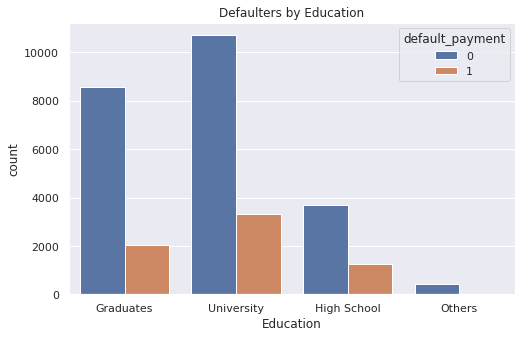

In [32]:
#Plotting the count plot for education based on default_paymnet
plt.figure(figsize=(8,5))
hx=sns.countplot(x=df['EDUCATION'],hue='default_payment',data=df)
plt.title('Defaulters by Education')
plt.xlabel('Education')
hx.set_xticklabels(['Graduates','University','High School','Others'])

We can observe that the defaulters are university level people followed by graduates.This could be because there are more number of university going customers.

Text(0.5, 1.0, 'Density Plot of Age by default_payment')

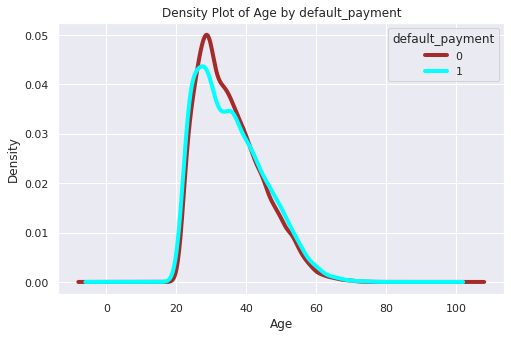

In [33]:
#Analysis by age
age_wide=df.pivot(columns = 'default_payment', values = 'AGE')
#Plotting the graph
age_wide.plot.kde(figsize = (8, 5),linewidth = 4,color=['brown','cyan'])
plt.xlabel('Age')
plt.title('Density Plot of Age by default_payment')

From the above graph , most defaulters are in the range 30-40 years

In [34]:
#Analysis by marriage
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Since we have only 3 labels defined,the extra label might be the missing data so we replace this with the mode.

In [35]:
df['MARRIAGE'].replace(0,2, inplace = True)

[Text(0, 0, 'Married'), Text(0, 0, 'Unmarried'), Text(0, 0, 'Others')]

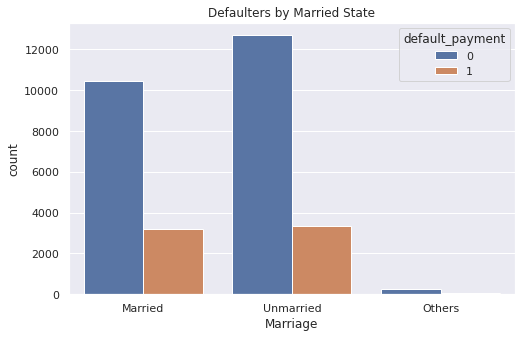

In [36]:
plt.figure(figsize=(8,5))
hx=sns.countplot(x=df['MARRIAGE'],hue='default_payment',data=df)
plt.title('Defaulters by Married State')
plt.xlabel('Marriage')
hx.set_xticklabels(['Married','Unmarried','Others'])

We can see that both married and unmarried customers are equally defaulters, so clearly marriage status does not affect.

<Figure size 576x360 with 0 Axes>

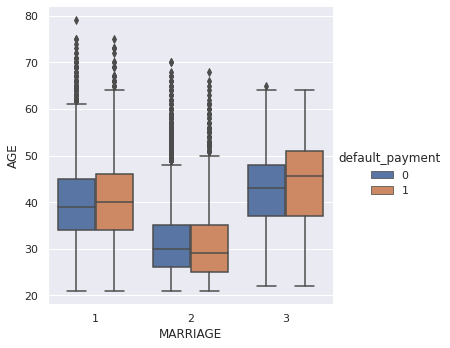

In [37]:
#Box Plot for marriage,age and gender
plt.figure(figsize=(8,5))
sns.catplot(x="MARRIAGE", y="AGE", hue="default_payment",data=df, kind="box")

<Figure size 576x360 with 0 Axes>

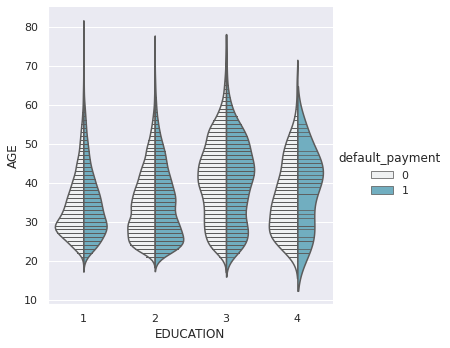

In [39]:
#Plotting a catplot for age and education
plt.figure(figsize=(8,5))
sns.catplot(x="EDUCATION", y="AGE", hue="default_payment",color='c',
            kind="violin", inner="stick", split=True,data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

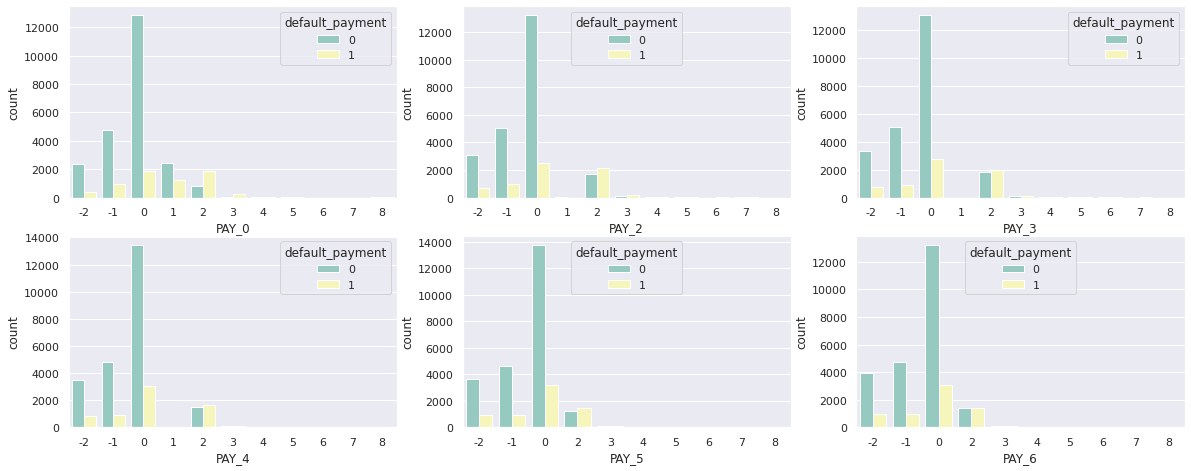

In [40]:
#Analysis by History of past payments
plt.figure(figsize = (20,50), facecolor = 'white')
plotnumber = 1
for feature in df.columns[6:12]:
  ax = plt.subplot(12, 3, plotnumber)
  sns.countplot(df[feature],hue='default_payment',data=df,palette="Set3")
  plt.xlabel(feature)
  plotnumber+=1

plt.show()

Non Defaulters have a much higher proportion of zero or negative PAY_X variables (this means that being current or ahead of payments is associated with not defaulting in the following month)

<Figure size 720x504 with 0 Axes>

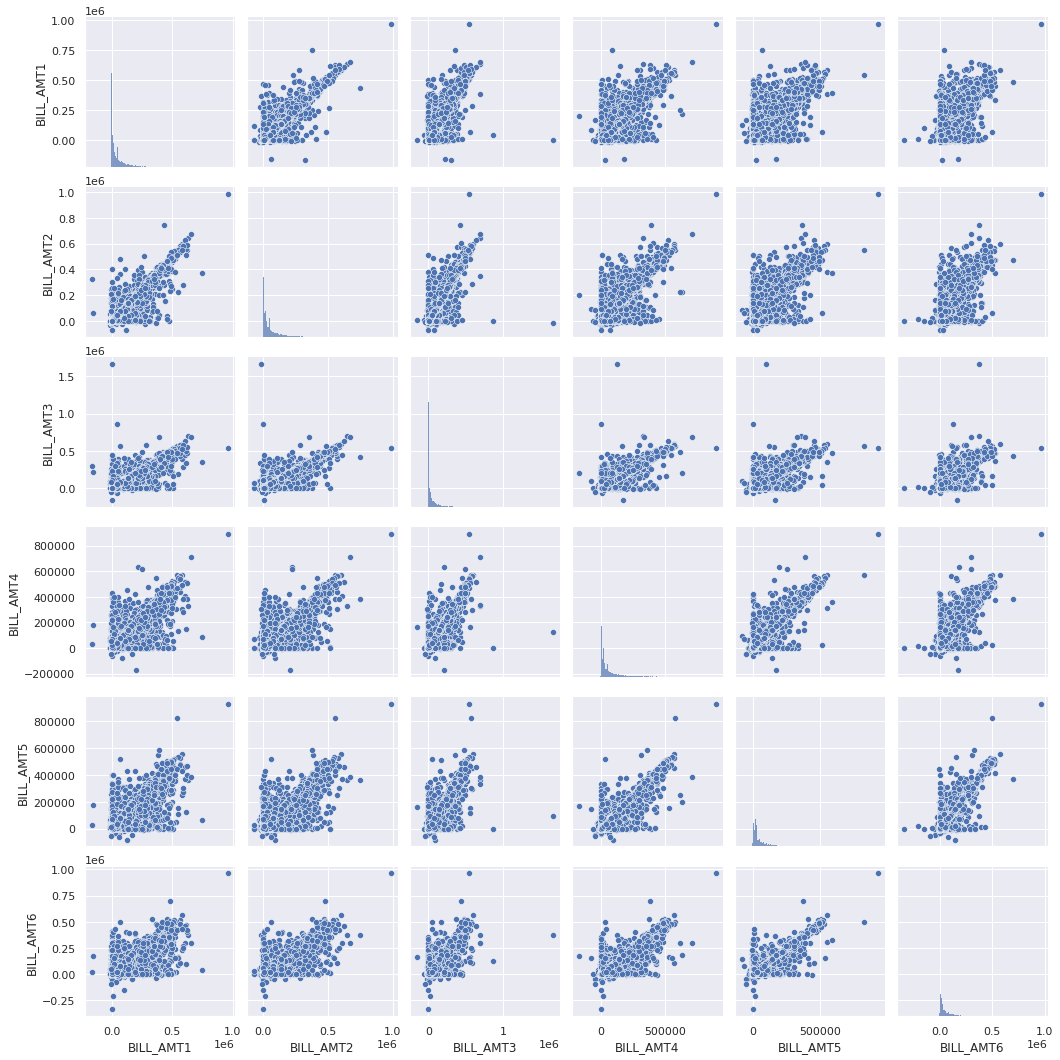

In [41]:
#Analysis using Amount of bill statement 
plt.figure(figsize = (10,7))
sns.pairplot(df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']])

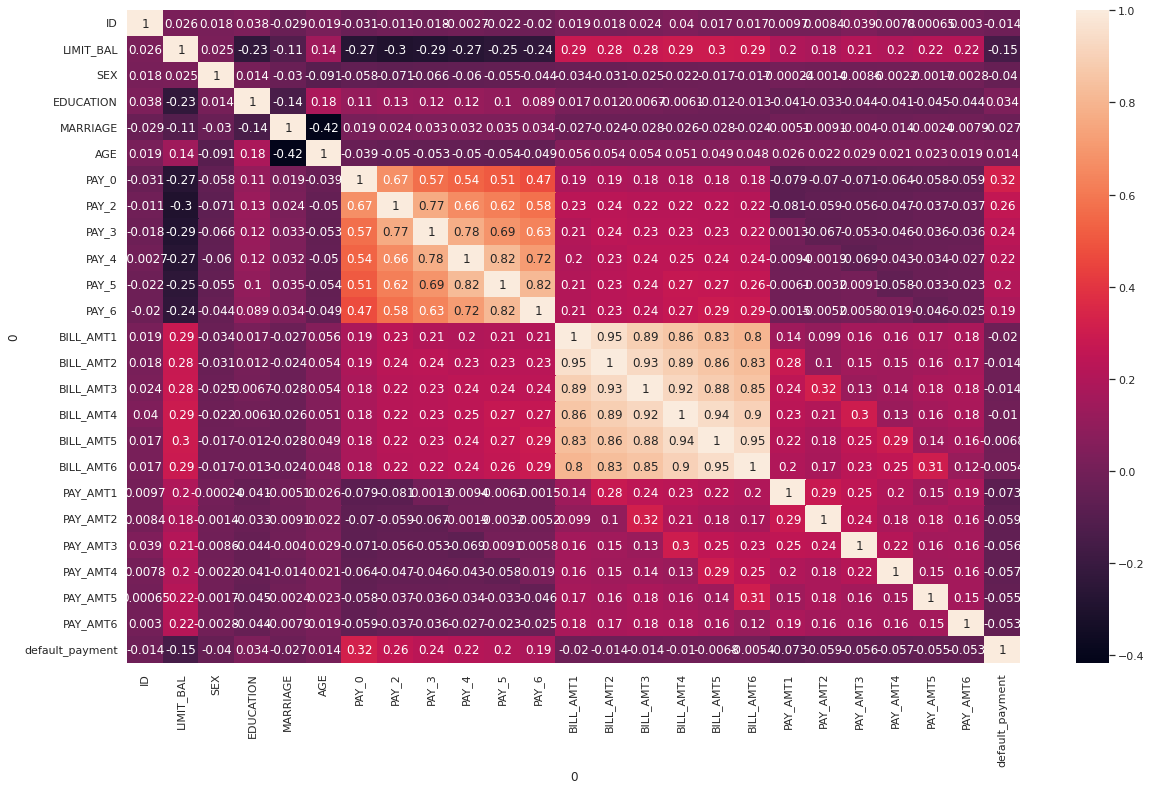

In [42]:
#Plotting the correlation matrix
plt.figure(figsize = (20,12))
sns.heatmap(df.corr(),annot=True)

In [43]:
#Creating a dataframe without certain columns
samp=df.drop(['ID','SEX','EDUCATION','MARRIAGE','default_payment'],axis=1)

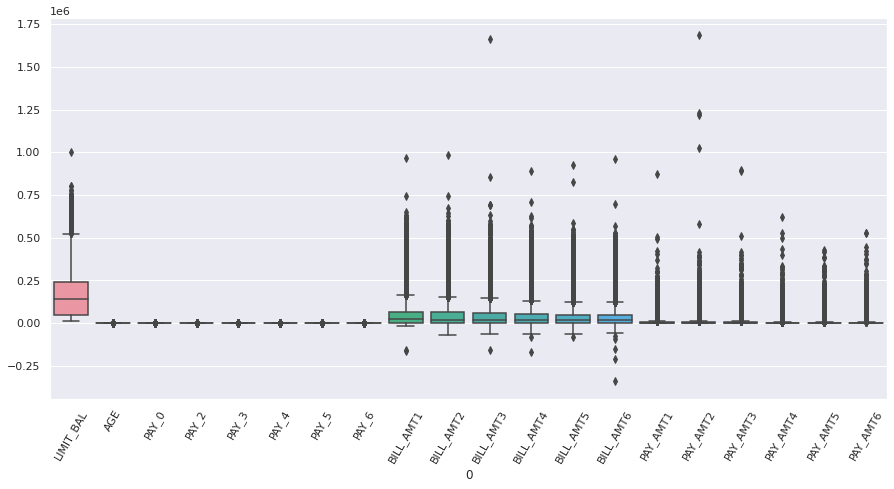

In [44]:
#Boxplot for all the features
plt.figure(figsize=(15,7))
ax=sns.boxplot(data=samp)
ax.tick_params(axis='x', rotation=60)

We can observe from the barplot that the data has many outliers.Due to the lack of domain knowledge and the very high number of identifiable outliers, no samples have been discarded as outliers.

In [45]:
#Making a copy of the data so that original data is not lost
dfn=df.copy()

#Data Preperation

In [46]:
#Making new columns from gender and education using pd.get_dummies
dfn=pd.get_dummies( columns= ['SEX','EDUCATION','MARRIAGE'], prefix = ['SEX','EDUCATION','MARRIAGE'], data = dfn)

In [47]:
#Dropping the ID column
dfn.drop("ID",axis=1,inplace=True)

In [48]:
dfn.head(3) #Checking

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,default_payment,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
1,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,1,0,1,0,1,0,0,1,0,0
2,120000,26,-1,2,0,0,0,2,2682,1725,...,1,0,1,0,1,0,0,0,1,0
3,90000,34,0,0,0,0,0,0,29239,14027,...,0,0,1,0,1,0,0,0,1,0


In [49]:
#Keeping the independent variables in X
X = dfn.drop('default_payment',axis=1)

In [50]:
X.head(2)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT6,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
1,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,1,0,1,0,0,1,0,0
2,120000,26,-1,2,0,0,0,2,2682,1725,...,2000,0,1,0,1,0,0,0,1,0


In [51]:
#Keeping the dependent variable in Y
Y = dfn['default_payment']
Y.head(2)

1    1
2    1
Name: default_payment, dtype: int64

#Handling Imbalance in the data using SMOTE(Synthetic Minority Oversampling Technique)

In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
xsm, ysm = smote.fit_resample(X, Y)
print('Original dataset shape', len(dfn))
print('Resampled dataset shape', len(ysm))

Original dataset shape 30000
Resampled dataset shape 46728


#Standardizing the independent variables

In [53]:
#Using MinMaxScaler on X
scaler = MinMaxScaler()
scaler.fit(xsm)
xsm=scaler.transform(xsm)

In [54]:
#Using test_train_split to divide into test and train sets
X_train, X_test, Y_train, Y_test = train_test_split( xsm,ysm , test_size = 0.2, random_state = 42,stratify=ysm) 

In [55]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(37382, 29) (9346, 29) (37382,) (9346,)


#Fitting the data on different models

In [56]:
# Defining a function to print all the results of the model
def metrics(model,Y_train,Y_test,train_pred,test_pred):
  print("Classification Report")
  print('----------------------')
  print(classification_report(Y_test,test_pred))
  print('----------------------')
  print("The accuracy on train data is ", accuracy_score(Y_train,train_pred))
  print("The accuracy on test data is ", accuracy_score(Y_test,test_pred))
  print('ROC_AUC_Score on Training : ',roc_auc_score(Y_train,train_pred) )
  print('ROC_AUC_Score on Test : ',roc_auc_score(Y_test,test_pred) )
  print('Recall Score : ',recall_score(Y_test,test_pred))
  print('----------------------')
  print('Confusion Matrix')
  plt.figure(figsize=(3, 2))
  mat = confusion_matrix(Y_test, test_pred)
  sns.heatmap(mat, annot=True,fmt='g',cmap='YlGnBu')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

#**Logistic Regression**

In [57]:
lr = LogisticRegression(fit_intercept=True, max_iter=10000)
lr.fit(X_train, Y_train) #Fitting the object to train dataset

LogisticRegression(max_iter=10000)

In [58]:
#Predicting the values
lr_trp = lr.predict(X_train)
lr_tep = lr.predict(X_test)

Classification Report
----------------------
              precision    recall  f1-score   support

           0       0.79      0.95      0.86      4673
           1       0.94      0.75      0.83      4673

    accuracy                           0.85      9346
   macro avg       0.87      0.85      0.85      9346
weighted avg       0.87      0.85      0.85      9346

----------------------
The accuracy on train data is  0.8473061901449895
The accuracy on test data is  0.8509522790498609
ROC_AUC_Score on Training :  0.8473061901449895
ROC_AUC_Score on Test :  0.8509522790498609
Recall Score :  0.7526214423282688
----------------------
Confusion Matrix


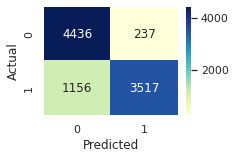

In [59]:
#Using the metrics funtion to get the results
metrics(lr,Y_train,Y_test,lr_trp,lr_tep)

#**Random Forest Classifier**

In [60]:
#Using Random Forest Classifier
classifier = RandomForestClassifier() 
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
rf = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
rf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [61]:
rf.best_estimator_

RandomForestClassifier(max_depth=7)

In [62]:
rf_trp =  rf.predict(X_train)
rf_tep  = rf.predict(X_test)

Classification Report
----------------------
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      4673
           1       0.88      0.77      0.82      4673

    accuracy                           0.83      9346
   macro avg       0.84      0.83      0.83      9346
weighted avg       0.84      0.83      0.83      9346

----------------------
The accuracy on train data is  0.8356695735915681
The accuracy on test data is  0.833832655681575
ROC_AUC_Score on Training :  0.835669573591568
ROC_AUC_Score on Test :  0.8338326556815752
Recall Score :  0.7727369997860047
----------------------
Confusion Matrix


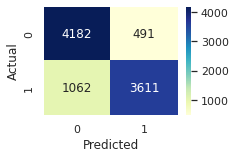

In [63]:
metrics(rf,Y_train,Y_test,rf_trp,rf_tep)

In [64]:
#Checking the feature importance
features = X.columns
importances = rf.best_estimator_.feature_importances_
indices = np.argsort(importances)

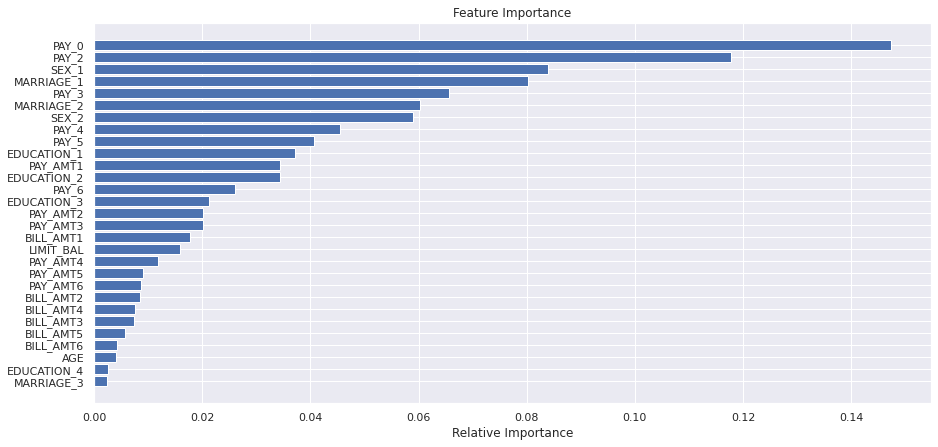

In [65]:
#Visualization
plt.figure(figsize=(15,7))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

So the feature PAY_0 is the most important feature according to Random Forest Classifier.The ROC_AUC score is 0.83

#**XG Boost Classifier**

In [66]:
classifierxg = XGBClassifier() 
grid_val = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
xg = GridSearchCV(classifierxg, param_grid = grid_val, scoring = 'roc_auc', cv=5)

In [67]:
#Fitting the object
xg.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [68]:
xg.best_estimator_

XGBClassifier(max_depth=7)

In [69]:
#Predicting the values
xg_trp =  xg.predict(X_train)
xg_tep  = xg.predict(X_test)

Classification Report
----------------------
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4673
           1       0.92      0.81      0.86      4673

    accuracy                           0.87      9346
   macro avg       0.88      0.87      0.87      9346
weighted avg       0.88      0.87      0.87      9346

----------------------
The accuracy on train data is  0.8898667808035953
The accuracy on test data is  0.869997860047079
ROC_AUC_Score on Training :  0.8898667808035953
ROC_AUC_Score on Test :  0.869997860047079
Recall Score :  0.8065482559383693
----------------------
Confusion Matrix


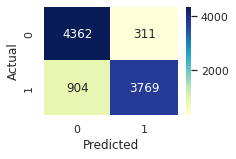

In [70]:
#Using metrics function
metrics(xg,Y_train,Y_test,xg_trp,xg_tep)

ROC_AUC score is better than Random Forest.

#**Gradient Boosting Classifier**



In [71]:
#Using Gradient Forest Classifier
classifiergb = GradientBoostingClassifier() 
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
gb = GridSearchCV(classifiergb, param_grid = grid_values, scoring = 'roc_auc', cv=5)

In [72]:
#Fitting the object
gb.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [73]:
#Predicting the values
gb_trp =  gb.predict(X_train)
gb_tep  = gb.predict(X_test)

In [74]:
gb.best_estimator_

GradientBoostingClassifier(max_depth=7)

Classification Report
----------------------
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4673
           1       0.92      0.81      0.86      4673

    accuracy                           0.87      9346
   macro avg       0.87      0.87      0.87      9346
weighted avg       0.87      0.87      0.87      9346

----------------------
The accuracy on train data is  0.8960729762987534
The accuracy on test data is  0.8681789000641986
ROC_AUC_Score on Training :  0.8960729762987534
ROC_AUC_Score on Test :  0.8681789000641985
Recall Score :  0.8061202653541623
----------------------
Confusion Matrix


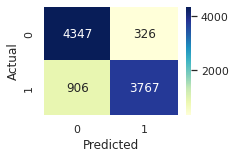

In [75]:
#Using metrics function
metrics(gb,Y_train,Y_test,gb_trp,gb_tep)

#**KNN(K Nearest Neighbors) Classifier**

In [76]:
#Using KNN Classifier
#Importing RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV
classifierkn = KNeighborsClassifier () 
grid_values = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11]}
kn = RandomizedSearchCV(classifierkn, param_distributions  = grid_values, scoring = 'roc_auc', cv=5)

In [77]:
#Fitting the object
kn.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11]},
                   scoring='roc_auc')

In [78]:
#Predicting the values
kn_trp =  kn.predict(X_train)
kn_tep  = kn.predict(X_test)

In [79]:
kn.best_estimator_

KNeighborsClassifier(n_neighbors=11)

Classification Report
----------------------
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      4673
           1       0.90      0.79      0.84      4673

    accuracy                           0.85      9346
   macro avg       0.86      0.85      0.85      9346
weighted avg       0.86      0.85      0.85      9346

----------------------
The accuracy on train data is  0.8667273019100101
The accuracy on test data is  0.8509522790498609
ROC_AUC_Score on Training :  0.8667273019100101
ROC_AUC_Score on Test :  0.8509522790498609
Recall Score :  0.786646693772737
----------------------
Confusion Matrix


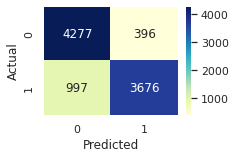

In [80]:
#Using metrics function
metrics(kn,Y_train,Y_test,kn_trp,kn_tep)

#**Support Vector Machines (SVM)**

In [81]:
#Using SVM Classifier
svc=SVC(probability=True)
# defining parameter range
param_grid = {'C': [0.1, 1],
              'gamma': [ 0.1, 0.01, 0.001],
              'kernel': ['rbf']}
sv = GridSearchCV(svc, param_grid,refit = True,scoring = 'roc_auc', verbose = 3,cv=3)



In [82]:
#Fitting the object
sv.fit(X_train, Y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.896 total time= 4.2min
[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.886 total time= 4.1min
[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time= 4.0min
[CV 1/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.887 total time= 5.8min
[CV 2/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.879 total time= 5.2min
[CV 3/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.881 total time= 4.9min
[CV 1/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.845 total time= 7.0min
[CV 2/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.834 total time= 6.9min
[CV 3/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.833 total time= 7.1min
[CV 1/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.898 total time= 3.5min
[CV 2/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.888 total time= 3.3min
[CV 3/3] END ........C=1, gamma=0.1, kernel=rbf;,

GridSearchCV(cv=3, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='roc_auc', verbose=3)

In [83]:
#Predicting the values
sv_trp =  sv.predict(X_train)
sv_tep  = sv.predict(X_test)

In [84]:
sv.best_estimator_

SVC(C=1, gamma=0.1, probability=True)

Classification Report
----------------------
              precision    recall  f1-score   support

           0       0.78      0.96      0.86      4673
           1       0.95      0.73      0.82      4673

    accuracy                           0.84      9346
   macro avg       0.86      0.84      0.84      9346
weighted avg       0.86      0.84      0.84      9346

----------------------
The accuracy on train data is  0.8398159542025574
The accuracy on test data is  0.8445324202867537
ROC_AUC_Score on Training :  0.8398159542025573
ROC_AUC_Score on Test :  0.8445324202867537
Recall Score :  0.7288679649047721
----------------------
Confusion Matrix


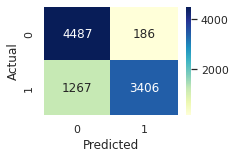

In [85]:
#Using metrics function
metrics(sv,Y_train,Y_test,sv_trp,sv_tep)

#**Naive Bayes Classifier**

In [86]:
nb = MultinomialNB()
nb.fit(X_train, Y_train)

MultinomialNB()

In [87]:
#Predicting the values
nb_trp =  nb.predict(X_train)
nb_tep  = nb.predict(X_test)

Classification Report
----------------------
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      4673
           1       0.74      0.74      0.74      4673

    accuracy                           0.74      9346
   macro avg       0.74      0.74      0.74      9346
weighted avg       0.74      0.74      0.74      9346

----------------------
The accuracy on train data is  0.7385372639238136
The accuracy on test data is  0.7399957200941579
ROC_AUC_Score on Training :  0.7385372639238135
ROC_AUC_Score on Test :  0.739995720094158
Recall Score :  0.7380697624652258
----------------------
Confusion Matrix


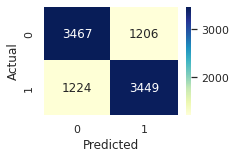

In [88]:
#Using metrics function
metrics(nb,Y_train,Y_test,nb_trp,nb_tep)

The ROC_AUC score on the test data is 0.74 for Naive Bayes Classifier.

#**Decision Tree Classifier**

In [89]:
#Using Decision Tree Classier
dt = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
dt.fit(X_train, Y_train) #Fitting the data

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [90]:
#Predicting the values
dt_trp =  dt.predict(X_train)
dt_tep  = dt.predict(X_test)

Classification Report
----------------------
              precision    recall  f1-score   support

           0       0.70      0.91      0.80      4673
           1       0.88      0.62      0.72      4673

    accuracy                           0.76      9346
   macro avg       0.79      0.76      0.76      9346
weighted avg       0.79      0.76      0.76      9346

----------------------
The accuracy on train data is  0.7642180728692953
The accuracy on test data is  0.7648191739781725
ROC_AUC_Score on Training :  0.7642180728692954
ROC_AUC_Score on Test :  0.7648191739781725
Recall Score :  0.6173764177188101
----------------------
Confusion Matrix


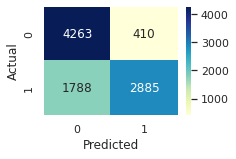

In [91]:
#Using metrics function
metrics(dt,Y_train,Y_test,dt_trp,dt_tep)

##Plotting the AUC ROC Curves for all the models

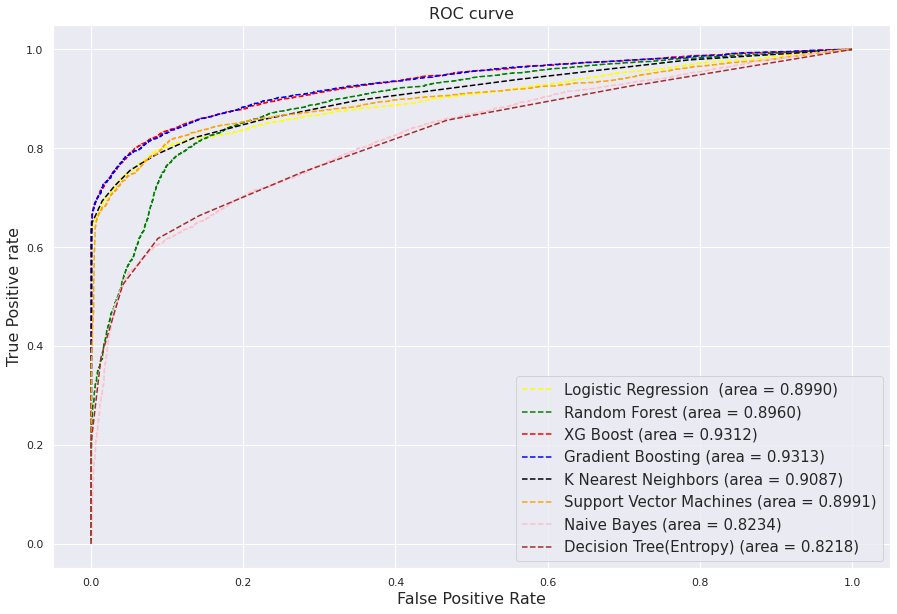

In [97]:
# Predicting probabilities
pred_prob1 = lr.predict_proba(X_test)
pred_prob2 = rf.predict_proba(X_test)
pred_prob3 = xg.predict_proba(X_test) 
pred_prob4 = gb.predict_proba(X_test)
pred_prob5 = kn.predict_proba(X_test) 
pred_prob6 = sv.predict_proba(X_test)
pred_prob7 = nb.predict_proba(X_test)
pred_prob8 = dt.predict_proba(X_test)

# Roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(Y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(Y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(Y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(Y_test, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(Y_test, pred_prob6[:,1], pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(Y_test, pred_prob7[:,1], pos_label=1)
fpr8, tpr8, thresh8 = roc_curve(Y_test, pred_prob8[:,1], pos_label=1)


# Auc scores
auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(Y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(Y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(Y_test, pred_prob4[:,1])
auc_score5 = roc_auc_score(Y_test, pred_prob5[:,1])
auc_score6 = roc_auc_score(Y_test, pred_prob6[:,1])
auc_score7 = roc_auc_score(Y_test, pred_prob7[:,1])
auc_score8 = roc_auc_score(Y_test, pred_prob8[:,1])



plt.figure(figsize = (15,10))
# plotting roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='yellow', label='Logistic Regression  (area = %0.4f)' % auc_score1)
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest (area = %0.4f)' % auc_score2)
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='XG Boost (area = %0.4f)' % auc_score3)
plt.plot(fpr4, tpr4, linestyle='--',color='blue', label='Gradient Boosting (area = %0.4f)' % auc_score4)
plt.plot(fpr5, tpr5, linestyle='--',color='black', label='K Nearest Neighbors (area = %0.4f)' % auc_score5)
plt.plot(fpr6, tpr6, linestyle='--',color='orange', label='Support Vector Machines (area = %0.4f)' % auc_score6)
plt.plot(fpr7, tpr7, linestyle='--',color='pink', label='Naive Bayes (area = %0.4f)' % auc_score7)
plt.plot(fpr8, tpr8, linestyle='--',color='brown', label='Decision Tree(Entropy) (area = %0.4f)' % auc_score8)



# title

plt.title('ROC curve',fontsize=16)
# x label
plt.xlabel('False Positive Rate',fontsize=16)
# y label
plt.ylabel('True Positive rate',fontsize=16)

plt.legend(loc='best',fontsize=15)
plt.show()

#Conclusion


The models Logistic Regression, Random Forest, XG Boost, Gradient Boost, K Nearest Neighbors,Support vector machines, Naive Bayes and Decision Tree Classifier were compared against each other.

Since there was imbalance in the dataset we have the SMOTE technique to resolve that imbalance.Hyperparameter tuning was performed for models in order find the best roc_auc score

All models have performed over 50% of ROC_AUC score and from all these 8 models XG Boost has a score of 86% which it the best model.However, all the models implemented achieved comparable results in terms of accuracy.